# Libraries

In [36]:
###### Step 1: Import Libraries
# Synthetic dataset
import seaborn as sns
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Graphs

``` Graph 1
Graph 1
```

<Axes: xlabel='feature1', ylabel='feature2'>

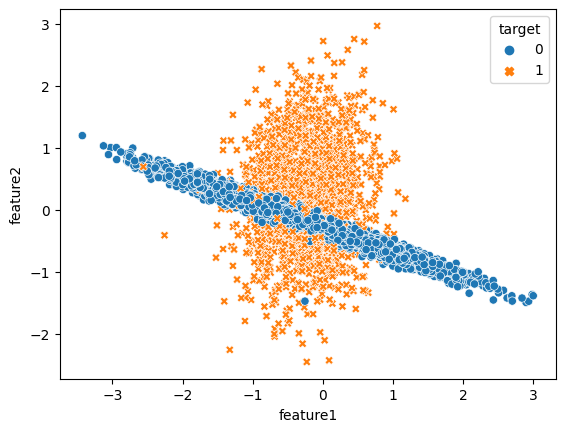

In [372]:
###### Step 2: Create Imbalanced Dataset
# Create an imbalanced dataset
X, y = make_classification(n_samples=8000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.8, 0.2],
                           class_sep=0.2)
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 2
Graph 2
```

<Axes: xlabel='feature1', ylabel='feature2'>

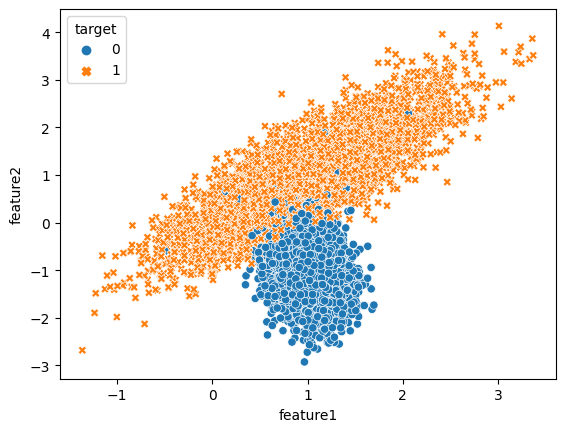

In [377]:
X, y = make_classification(n_samples=8000,
          n_features=2, n_redundant=0,
          n_informative=2,
          n_clusters_per_class=1)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 3
Graph 3
```

<Axes: xlabel='feature1', ylabel='feature2'>

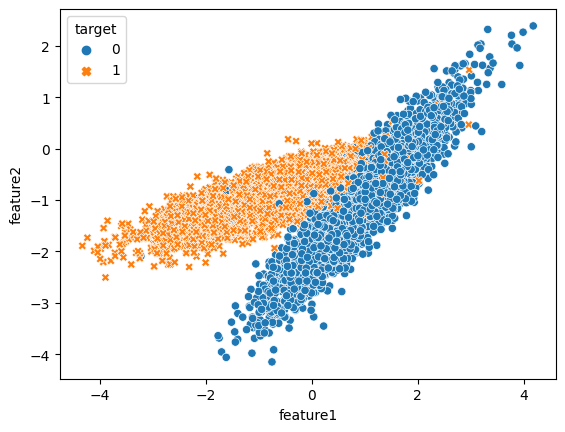

In [321]:
X, y = make_classification(n_samples=8000,
                            n_features=2,
                            n_redundant=0,
                            n_informative=2,
                            n_clusters_per_class=1)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 4
Graph 4
```

<Axes: xlabel='feature1', ylabel='feature2'>

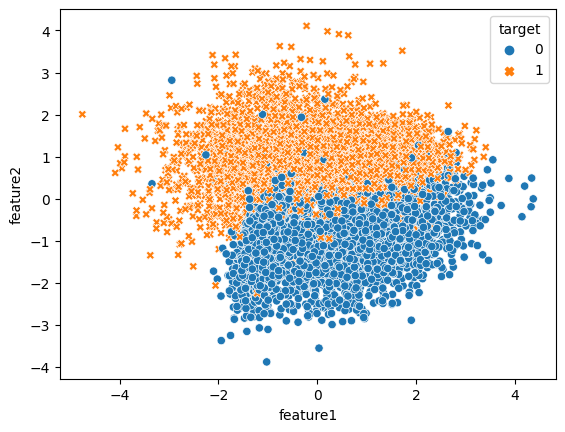

In [159]:
X, y = make_classification(n_samples=8000,
                            n_features=2,
                           n_redundant=0,
                           n_informative=2)
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 5
Graph 5
```

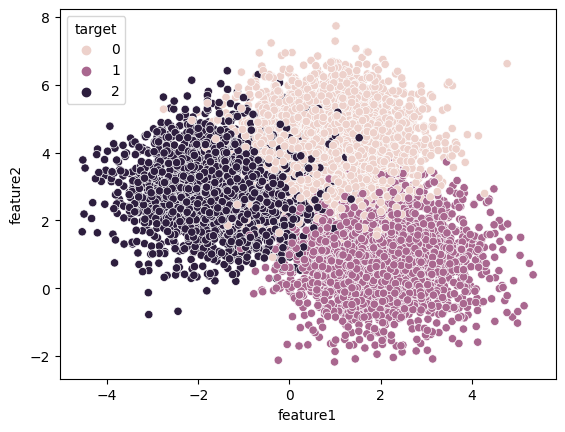

In [248]:
X, y = make_blobs(n_samples=8000, 
                centers=3, n_features=2,
                random_state=0)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

``` Graph 6
Graph 6
```

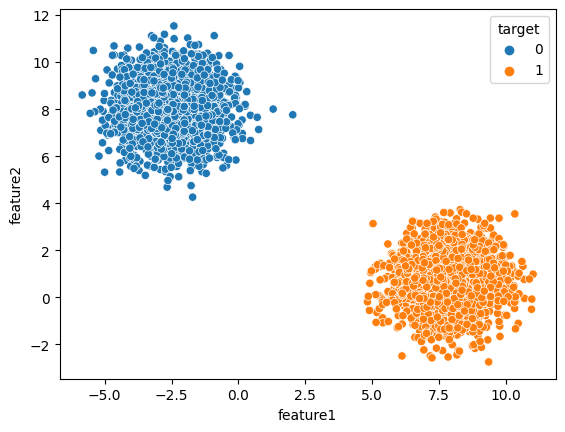

In [396]:
X, y = make_blobs(n_samples=5000, 
                centers=2, 
                n_features=2)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

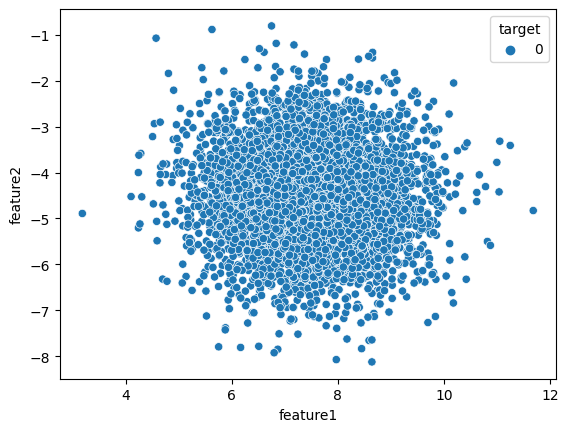

In [268]:
X, y = make_blobs(n_samples=5000, 
                centers=1, 
                n_features=2)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

In [397]:
df

,feature1,feature2,target
0,8.122378,-0.572446,1
1,7.682727,1.072683,1
2,7.731297,1.315313,1
3,8.188226,0.759872,1
4,8.524927,0.180573,1
...,...,...,...
4995,-2.638711,7.987184,0
4996,6.772815,-0.050996,1
4997,7.409949,1.161132,1
4998,-1.203566,5.270254,0


# OneClassSVM

In [398]:
scalerSVC=StandardScaler()
data_scaled_svc=scalerSVC.fit_transform(X)
one_class_svm = OneClassSVM(nu=0.1, kernel = 'rbf', gamma = 'auto').fit(data_scaled_svc)

In [399]:
df['label_svm'] = one_class_svm.predict(X)
df['score_svm'] = one_class_svm.score_samples(X)
df

,feature1,feature2,target,label_svm,score_svm
0,8.122378,-0.572446,1,-1,1.138832e-08
1,7.682727,1.072683,1,-1,3.611260e-08
2,7.731297,1.315313,1,-1,1.682949e-08
3,8.188226,0.759872,1,-1,2.164057e-09
4,8.524927,0.180573,1,-1,4.249046e-10
...,...,...,...,...,...
4995,-2.638711,7.987184,0,-1,3.536775e-08
4996,6.772815,-0.050996,1,-1,3.125847e-05
4997,7.409949,1.161132,1,-1,1.672576e-07
4998,-1.203566,5.270254,0,-1,1.130110e-01


In [400]:
series_score_svm=np.array(df['score_svm'])
series_score_reshaped_svm=series_score_svm.reshape(-1,1)
scaler=MinMaxScaler()
data_scaled_svm=scaler.fit_transform(series_score_reshaped_svm)
df['score_svm'] = data_scaled_svm
df

,feature1,feature2,target,label_svm,score_svm
0,8.122378,-0.572446,1,-1,4.787501e-09
1,7.682727,1.072683,1,-1,1.518126e-08
2,7.731297,1.315313,1,-1,7.074895e-09
3,8.188226,0.759872,1,-1,9.097411e-10
4,8.524927,0.180573,1,-1,1.786243e-10
...,...,...,...,...,...
4995,-2.638711,7.987184,0,-1,1.486813e-08
4996,6.772815,-0.050996,1,-1,1.314065e-05
4997,7.409949,1.161132,1,-1,7.031286e-08
4998,-1.203566,5.270254,0,-1,4.750833e-02


In [401]:
df['umbral_svm']=np.where(df['score_svm']<(np.percentile(df['score_svm'],5)),1,0)
df['label_svm']=np.where(df['label_svm']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm
0,8.122378,-0.572446,1,1,4.787501e-09,0
1,7.682727,1.072683,1,1,1.518126e-08,0
2,7.731297,1.315313,1,1,7.074895e-09,0
3,8.188226,0.759872,1,1,9.097411e-10,0
4,8.524927,0.180573,1,1,1.786243e-10,0
...,...,...,...,...,...,...
4995,-2.638711,7.987184,0,1,1.486813e-08,0
4996,6.772815,-0.050996,1,1,1.314065e-05,0
4997,7.409949,1.161132,1,1,7.031286e-08,0
4998,-1.203566,5.270254,0,1,4.750833e-02,0


# LocalOutlierFactor

In [402]:
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',contamination=0.1)
df['label_LOF'] = clf.fit_predict(X)
df['score_LOF'] = clf.negative_outlier_factor_
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF
0,8.122378,-0.572446,1,1,4.787501e-09,0,1,-1.016928
1,7.682727,1.072683,1,1,1.518126e-08,0,1,-1.017983
2,7.731297,1.315313,1,1,7.074895e-09,0,1,-0.999185
3,8.188226,0.759872,1,1,9.097411e-10,0,1,-0.974472
4,8.524927,0.180573,1,1,1.786243e-10,0,1,-0.996760
...,...,...,...,...,...,...,...,...
4995,-2.638711,7.987184,0,1,1.486813e-08,0,1,-0.971048
4996,6.772815,-0.050996,1,1,1.314065e-05,0,1,-1.055428
4997,7.409949,1.161132,1,1,7.031286e-08,0,1,-1.019308
4998,-1.203566,5.270254,0,1,4.750833e-02,0,-1,-1.334284


In [403]:
series_score_lof=np.array(df['score_LOF'])
series_score_reshaped_LOF=series_score_lof.reshape(-1,1)
scaler_LFO_only_variable=MinMaxScaler()
data_scaled_LOF=scaler_LFO_only_variable.fit_transform(series_score_reshaped_LOF)
df['score_LOF'] = data_scaled_LOF
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF
0,8.122378,-0.572446,1,1,4.787501e-09,0,1,0.966876
1,7.682727,1.072683,1,1,1.518126e-08,0,1,0.966336
2,7.731297,1.315313,1,1,7.074895e-09,0,1,0.975981
3,8.188226,0.759872,1,1,9.097411e-10,0,1,0.988662
4,8.524927,0.180573,1,1,1.786243e-10,0,1,0.977225
...,...,...,...,...,...,...,...,...
4995,-2.638711,7.987184,0,1,1.486813e-08,0,1,0.990419
4996,6.772815,-0.050996,1,1,1.314065e-05,0,1,0.947121
4997,7.409949,1.161132,1,1,7.031286e-08,0,1,0.965656
4998,-1.203566,5.270254,0,1,4.750833e-02,0,-1,0.804032


In [404]:
df['umbral_LOF']=np.where(df['score_LOF']<(np.percentile(df['score_LOF'],5)),1,0)
df['label_LOF']=np.where(df['label_LOF']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF,umbral_LOF
0,8.122378,-0.572446,1,1,4.787501e-09,0,0,0.966876,0
1,7.682727,1.072683,1,1,1.518126e-08,0,0,0.966336,0
2,7.731297,1.315313,1,1,7.074895e-09,0,0,0.975981,0
3,8.188226,0.759872,1,1,9.097411e-10,0,0,0.988662,0
4,8.524927,0.180573,1,1,1.786243e-10,0,0,0.977225,0
...,...,...,...,...,...,...,...,...,...
4995,-2.638711,7.987184,0,1,1.486813e-08,0,0,0.990419,0
4996,6.772815,-0.050996,1,1,1.314065e-05,0,0,0.947121,0
4997,7.409949,1.161132,1,1,7.031286e-08,0,0,0.965656,0
4998,-1.203566,5.270254,0,1,4.750833e-02,0,1,0.804032,1


# Isolation forest

In [405]:
# Train the Isolation Forest model on the sepal width data
isolation_forest = IsolationForest(n_estimators=500, contamination=0.1,max_features=2)
isolation_forest.fit(X)

IsolationForest(contamination=0.1, max_features=2, n_estimators=500)

In [406]:
df['Isolation_label'] = isolation_forest.predict(X)
df['Isolation_score'] = isolation_forest.score_samples(X)
series_score_isolation=np.array(df['Isolation_score'])
series_score_reshaped_isolation=series_score_isolation.reshape(-1,1)
scaler_isolation=MinMaxScaler()
data_scaled_isolation=scaler_isolation.fit_transform(series_score_reshaped_isolation)
df['Isolation_score'] = data_scaled_isolation
df['umbral_isolation']=np.where(df['Isolation_score']<(np.percentile(df['Isolation_score'],5)),1,0)
df['Isolation_label']=np.where(df['Isolation_label']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF,umbral_LOF,Isolation_label,Isolation_score,umbral_isolation
0,8.122378,-0.572446,1,1,4.787501e-09,0,0,0.966876,0,0,0.814116,0
1,7.682727,1.072683,1,1,1.518126e-08,0,0,0.966336,0,0,0.973629,0
2,7.731297,1.315313,1,1,7.074895e-09,0,0,0.975981,0,0,0.971273,0
3,8.188226,0.759872,1,1,9.097411e-10,0,0,0.988662,0,0,0.984269,0
4,8.524927,0.180573,1,1,1.786243e-10,0,0,0.977225,0,0,0.926712,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-2.638711,7.987184,0,1,1.486813e-08,0,0,0.990419,0,0,0.991656,0
4996,6.772815,-0.050996,1,1,1.314065e-05,0,0,0.947121,0,0,0.813282,0
4997,7.409949,1.161132,1,1,7.031286e-08,0,0,0.965656,0,0,0.955632,0
4998,-1.203566,5.270254,0,1,4.750833e-02,0,1,0.804032,1,1,0.312258,1


``` Graph result OneClassSVM
Graph result OneClassSVM
```

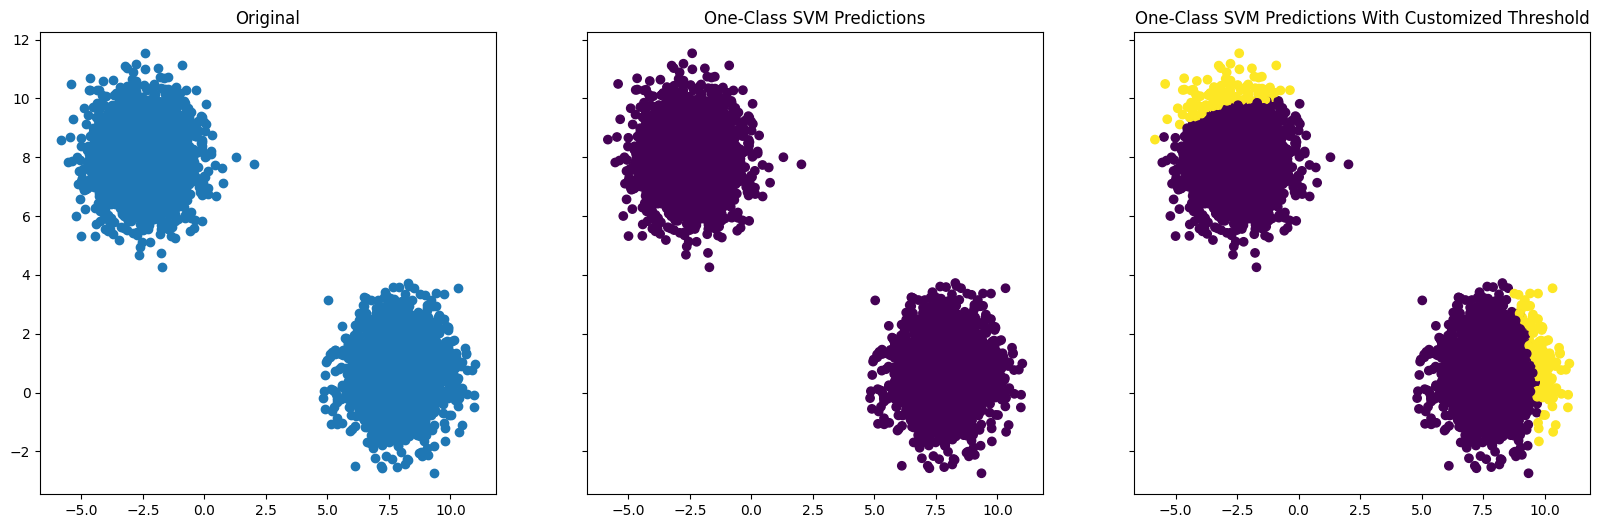

In [407]:

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['label_svm'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_svm'])
plt.show()

``` Graph result LOF
Graph result LOF
```


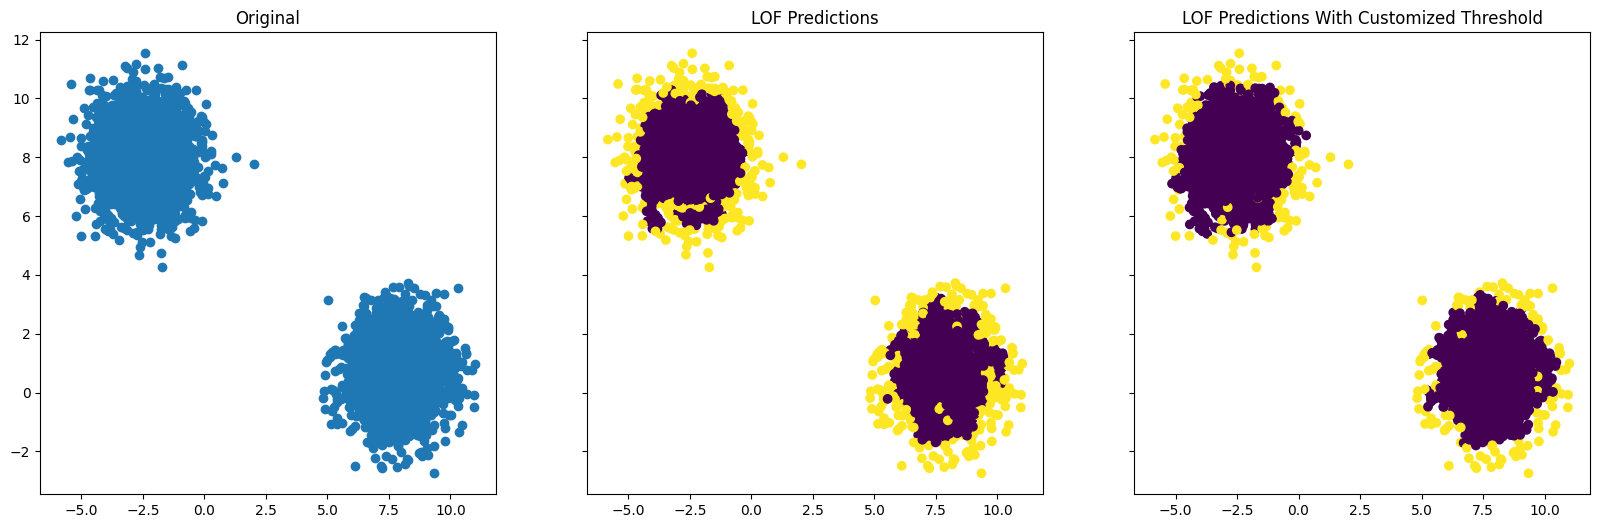

In [408]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('LOF Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['label_LOF'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('LOF Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_LOF'])
plt.show()

``` Graph result Isolation
Graph result Isolation
```

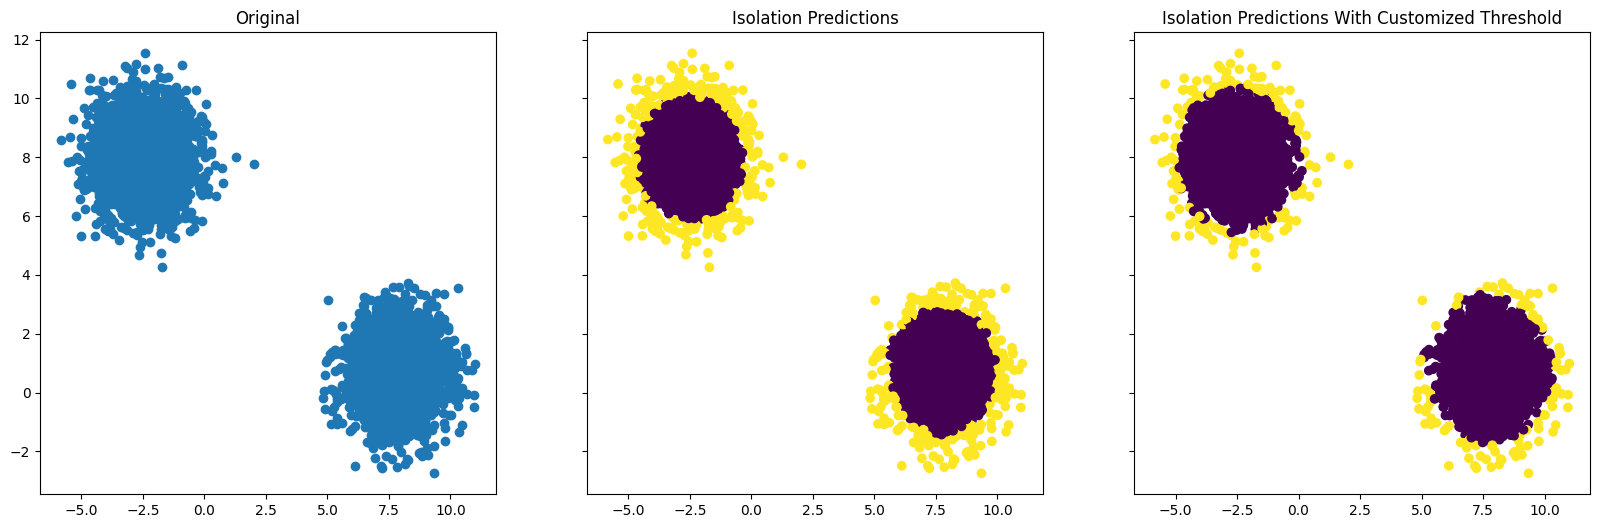

In [409]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('Isolation Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['Isolation_label'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('Isolation Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_isolation'])
plt.show()